*** QUESTION 1: The dataset is highly skewed toward the cities included in Delhi-NCR. 
So, we will summarise all the other cities in Rest of India while those in 
New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this 
would make our analysis turn toward Delhi-NCR v Rest of India.***


*** Question 1: part 1:Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India***

Delhi-NCR 7947
Rest_of_India 705


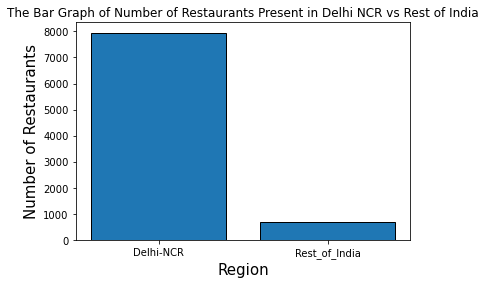

In [119]:
import pandas as pd
import matplotlib.pyplot as plt


file_data=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")
data=file_data[file_data['Country Code']==1]
Delhi_NCR=data[(data["City"]=="New Delhi") | (data["City"]=="Gurgaon") | (data["City"]=="Faridabad") | (data["City"]=="Ghaziabad") | (data["City"]=="Noida")]
Rest_of_India=data[(data["City"]!="New Delhi") & (data["City"]!="Gurgaon") & (data["City"]!="Faridabad") & (data["City"]!="Ghaziabad") & (data["City"]!="Noida")]

Restaurants_in_Delhi_NCR = Delhi_NCR["Restaurant ID"]
Restaurants_in_Rest_of_India = Rest_of_India["Restaurant ID"]

Number_of_Restaurants_in_Delhi_NCR = len(Restaurants_in_Delhi_NCR.unique())
Number_of_Restaurants_in_Rest_of_India = len(Restaurants_in_Rest_of_India.unique())

region=["Delhi-NCR","Rest_of_India"]
restaurants=[Number_of_Restaurants_in_Delhi_NCR,Number_of_Restaurants_in_Rest_of_India]

for i in range(len(region)):
    print(region[i],restaurants[i])
    

plt.bar(region,restaurants,edgecolor ='black')
plt.xlabel("Region",fontsize = 15)
plt.ylabel("Number of Restaurants",fontsize = 15)
plt.title("The Bar Graph of Number of Restaurants Present in Delhi NCR vs Rest of India")
plt.show()

*** Question 1: part 2: Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.
        Check using Zomato API whether this cuisines are actually not served 
        in restaurants of Delhi-NCR or just it due to incomplete dataset.***

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

file_data=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")
data=file_data[file_data['Country Code']==1]
Delhi_NCR=data[(data["City"]=="New Delhi") | (data["City"]=="Gurgaon") | (data["City"]=="Faridabad") | (data["City"]=="Ghaziabad") | (data["City"]=="Noida")]
Rest_of_India=data[(data["City"]!="New Delhi") & (data["City"]!="Gurgaon") & (data["City"]!="Faridabad") & (data["City"]!="Ghaziabad") & (data["City"]!="Noida")]

cuisines_li=[]
def separateCuisines(name):
    name=name.split(",")
    for data in name:
        if data.strip() not in cuisines_li:
            cuisines_li.append(data.strip())
            
Delhi_NCR["Cuisines"].apply(separateCuisines)
Delhi_NCR_cuisines_li=cuisines_li
cuisines_li=[]
Rest_of_India["Cuisines"].apply(separateCuisines)
Rest_of_India_cuisines_li=cuisines_li
        
absent_cuisines_Delhi_NCR=[]    
for data in Rest_of_India_cuisines_li:
    if data not in Delhi_NCR_cuisines_li:
        absent_cuisines_Delhi_NCR.append(data)


for data in absent_cuisines_Delhi_NCR:
    print(data)
    


German
Malwani
BBQ
Cajun


*** Question 1: part 3: Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India***

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

file_data=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")
data=file_data[file_data['Country Code']==1]
Delhi_NCR=data[(data["City"]=="New Delhi") | (data["City"]=="Gurgaon") | (data["City"]=="Faridabad") | (data["City"]=="Ghaziabad") | (data["City"]=="Noida")]
Rest_of_India=data[(data["City"]!="New Delhi") & (data["City"]!="Gurgaon") & (data["City"]!="Faridabad") & (data["City"]!="Ghaziabad") & (data["City"]!="Noida")]

cuisines_dict={}
def separateCuisines(name):
    name=name.split(",")
    cuisines_li=[]
    for data in name:
        cuisines_li.append(data.strip())
        
    for data in cuisines_li:
        if data in cuisines_dict:
            cuisines_dict[data]+=1
        else:
            cuisines_dict[data]=1
            
Delhi_NCR["Cuisines"].apply(separateCuisines)
cuisines=Counter(cuisines_dict)
Top_10_cuisines_in_Delhi_NCR=cuisines.most_common(10)
print("-------------------------------------------------------------------------------------")
print("The following cuisines are corresponding to the restaurants in Delhi-NCR:")
print("-------------------------------------------------------------------------------------")

for data in Top_10_cuisines_in_Delhi_NCR:
    print(data[0],data[1])

cuisines_dict={}
Rest_of_India["Cuisines"].apply(separateCuisines)
cuisines=Counter(cuisines_dict)
Top_10_cuisines_in_Rest_of_India=cuisines.most_common(10)

print("-------------------------------------------------------------------------------------")
print("The following cuisines are corresponding to the restaurants in Rest_of_India:")
print("-------------------------------------------------------------------------------------")

for data in Top_10_cuisines_in_Rest_of_India:
    print(data[0],data[1])
    
### Overall top 10 cuisnes in both Delhi-NCR and Rest-of-India
cuisines_dict={}
Delhi_NCR["Cuisines"].apply(separateCuisines)
Rest_of_India["Cuisines"].apply(separateCuisines)
cuisines=Counter(cuisines_dict)
Top_10_cuisines=cuisines.most_common(10)
print("-------------------------------------------------------------------------------------")
print("Overall Top 10 Cuisines in both Delhi-NCR and Rest-of-India")
print("-------------------------------------------------------------------------------------")
for data in Top_10_cuisines:
    print(data[0],data[1])




-------------------------------------------------------------------------------------
The following cuisines are corresponding to the restaurants in Delhi-NCR:
-------------------------------------------------------------------------------------
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
-------------------------------------------------------------------------------------
The following cuisines are corresponding to the restaurants in Rest_of_India:
-------------------------------------------------------------------------------------
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50
-------------------------------------------------------------------------------------
Overall Top 10 Cuisines in both Delhi-NCR and Rest-of-India
-------------------------------------------------------------------------------------


*** Question 1: part 4: Write a short detailed analysis of how cuisine served is different from Delhi 
        NCR to Rest of India. Plot the suitable graph to explain your inference.***

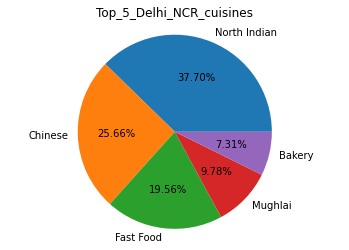

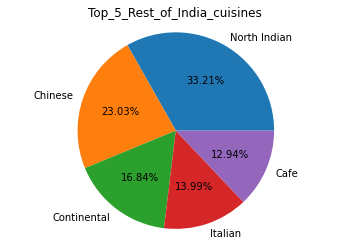

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

file_data=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")
data=file_data[file_data['Country Code']==1]
Delhi_NCR=data[(data["City"]=="New Delhi") | (data["City"]=="Gurgaon") | (data["City"]=="Faridabad") | (data["City"]=="Ghaziabad") | (data["City"]=="Noida")]
Rest_of_India=data[(data["City"]!="New Delhi") & (data["City"]!="Gurgaon") & (data["City"]!="Faridabad") & (data["City"]!="Ghaziabad") & (data["City"]!="Noida")]

cuisines_dict={}
def separateCuisines(name):
    name=name.split(",")
    cuisines_li=[]
    for data in name:
        cuisines_li.append(data.strip())
        
    for data in cuisines_li:
        if data in cuisines_dict:
            cuisines_dict[data]+=1
        else:
            cuisines_dict[data]=1
            
# Delhi_NCR
Delhi_NCR["Cuisines"].apply(separateCuisines)
Delhi_NCR_cuisines=Counter(cuisines_dict)
Top_5_Delhi_NCR_cuisines=Delhi_NCR_cuisines.most_common(5)

cuisines_in_Delhi_NCR=[]
served_at_no_of_resturants_in_Delhi_NCR=[]
for data in Top_5_Delhi_NCR_cuisines:
    cuisines_in_Delhi_NCR.append(data[0])
    served_at_no_of_resturants_in_Delhi_NCR.append(data[1])
    
plt.pie(served_at_no_of_resturants_in_Delhi_NCR,labels=cuisines_in_Delhi_NCR,autopct="%.2f%%")
plt.axis("equal")
plt.title("Top_5_Delhi_NCR_cuisines")
plt.show()

    
# Rest of India
cuisines_dict={}
Rest_of_India["Cuisines"].apply(separateCuisines)
Rest_of_India_cuisines=Counter(cuisines_dict)
Top_5_Rest_of_India_cuisines=Rest_of_India_cuisines.most_common(5)

cuisines_in_Rest_of_India=[]
served_at_no_of_resturants_in_Rest_of_Inida=[]
for data in Top_5_Rest_of_India_cuisines:
    cuisines_in_Rest_of_India.append(data[0])
    served_at_no_of_resturants_in_Rest_of_Inida.append(data[1])
plt.pie(served_at_no_of_resturants_in_Rest_of_Inida,labels=cuisines_in_Rest_of_India,autopct="%.2f%%")
plt.axis("equal")
plt.title("Top_5_Rest_of_India_cuisines")
plt.show()


*** QUESTION 2: User Rating of a restaurant plays a crucial role 
    in selecting a restaurant or ordering the food from the restaurant.***

*** Question 2: part 1: Write a short detail analysis of how the rating is affected by restaurant due 
        following features: Plot a suitable graph to explain your inference.***

*** Question 2: part 1: A] Number of Votes given Restaurant***

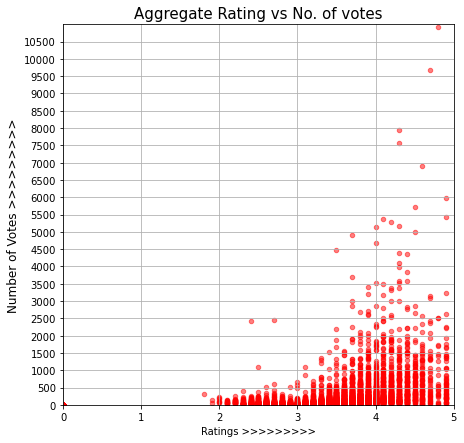

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")

# Graph plotting :


plt.figure(figsize=(7,7))
plt.scatter(df['Aggregate rating'],df['Votes'], s=20,alpha=0.5,color = 'red')
plt.yticks(np.arange(0,11000,500))
plt.axis([0,5,0,11000])
plt.title("Aggregate Rating vs No. of votes",size = 15)
plt.xlabel("Ratings >>>>>>>>>")
plt.ylabel("Number of Votes >>>>>>>>>", size=12)

plt.grid()
plt.show()

*** Question 2: part 1]: B] Restaurant serving more number of cuisines.***

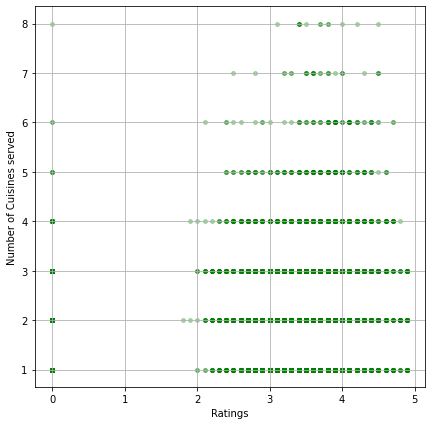

Number of cuisines served : 3 Served at NUmber of Restaurants : 1840
Number of cuisines served : 1 Served at NUmber of Restaurants : 3394
Number of cuisines served : 4 Served at NUmber of Restaurants : 584
Number of cuisines served : 2 Served at NUmber of Restaurants : 3444
Number of cuisines served : 5 Served at NUmber of Restaurants : 164
Number of cuisines served : 6 Served at NUmber of Restaurants : 74
Number of cuisines served : 7 Served at NUmber of Restaurants : 28
Number of cuisines served : 8 Served at NUmber of Restaurants : 14


In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")
df=df.loc[df["Cuisines"].notnull()]
num_of_cuisines=[len(i.split(",")) for i in df['Cuisines']]
rating=[i for i in df['Aggregate rating']]

plt.figure(figsize=(7,7))
plt.scatter(rating,num_of_cuisines,color='green',s=15,alpha=0.3)
plt.xlabel('Ratings')
plt.ylabel('Number of Cuisines served')
plt.grid()
plt.show()


num_of_cuisines_dict={}
for data in num_of_cuisines:
    if data in num_of_cuisines_dict:
        num_of_cuisines_dict[data]+=1
    else:
        num_of_cuisines_dict[data]=1
        
for data in num_of_cuisines_dict:
    print("Number of cuisines served :",data,"Served at NUmber of Restaurants :",num_of_cuisines_dict[data])
    

*** Question 2: part 1]: C] Average Cost of Restaurant***

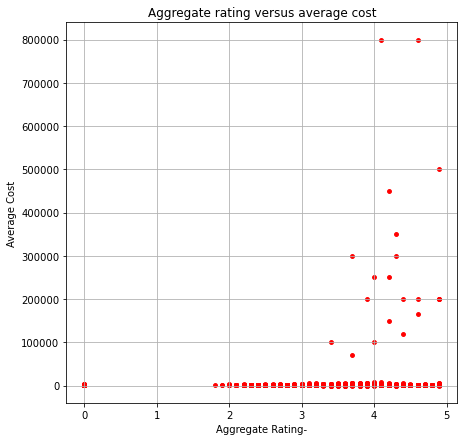

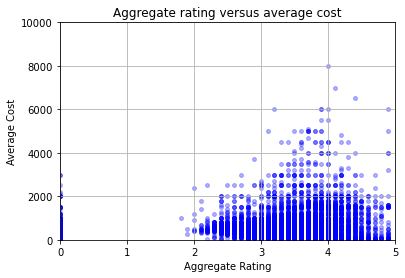

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")
# null check
df=df.loc[df["Average Cost for two"].notnull()]
average_cost=[i for i in df["Average Cost for two"]]
rating=[i for i in df['Aggregate rating']]

plt.figure(figsize=(7, 7))

plt.scatter(rating,average_cost, s=15, c='red')
plt.grid()
plt.xlabel('Aggregate Rating-')
plt.ylabel('Average Cost')
plt.title('Aggregate rating versus average cost')
plt.show()


plt.scatter(rating,average_cost, s=15, c='blue', alpha=0.3)
plt.grid()
plt.axis([0, 5, 0, 10000])
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Cost')
plt.title('Aggregate rating versus average cost')
plt.show()


*** Question 2: part 1]: D] Restaurant serving some specific cuisines.***

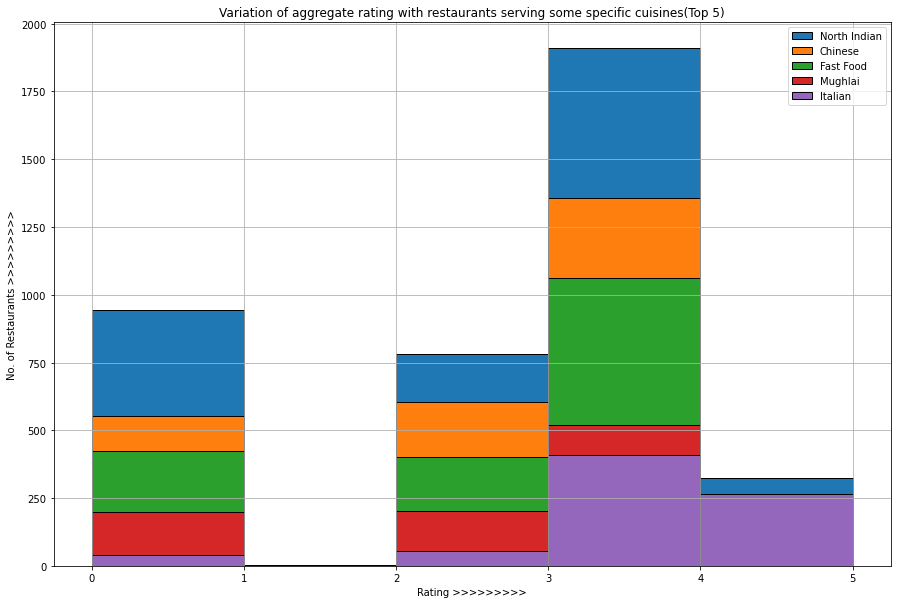

array(['North Indian', 'Chinese', 'Fast Food', 'Mughlai', 'Italian'],
      dtype='<U12')

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")
df = df.loc[df["Cuisines"].notnull()]
cuisine =[] 
for i in df["Cuisines"]:
    for j in i.split(","):
        cuisine.append(j)
dic=dict()
for i in cuisine:
    if i.strip() in dic.keys():
        dic[i.strip()]+=1
    else:
        dic[i.strip()]=1
a = sorted(dic.items(), key=lambda x: x[1],reverse = True)
popular = []
for i in range(5):
#     print(a[i][0])
    popular.append(a[i][0])
np_popular = np.array(popular)

# Graph plotting :

plt.figure(figsize=(15,10))
for i in np_popular:
    rating=[]
    for j,k in zip(df.Cuisines, df['Aggregate rating']):
        if i in j:
            rating.append(k)
    plt.hist(rating, edgecolor='black',bins=[0,1,2,3,4,5])
    plt.title('Variation of aggregate rating with restaurants serving some specific cuisines(Top 5)')

    plt.xlabel("Rating >>>>>>>>>")
    plt.ylabel("No. of Restaurants >>>>>>>>>")

plt.grid()
plt.legend(labels=np_popular)
plt.show()
np_popular 

*** Question 2: part 2]: Find the weighted restaurant rating of each locality and 
    find out the top 10 localities with more weighted restaurant rating?
Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .***

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")

np_locality=np.array([i for i in df['Locality']])
np_rating=np.array([i for i in df['Aggregate rating']])
np_votes=np.array([i for i in df['Votes']])

dic={}
for i in set(np_locality):
    if sum(np_votes[np.argwhere(np_locality==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_locality==i)])[0]/sum(np_votes[np.argwhere(np_locality==i)])[0]

new_dict=Counter(dic)
Top_10=new_dict.most_common(10)

print("Top 10 localities with more weighted restaurant rating :")
print("--------------------------------------------------------")
for locality in Top_10:
    print(locality[0])

Top 10 localities with more weighted restaurant rating :
--------------------------------------------------------
Aminabad
West Park
Fort Street
DIFC
Cengkareng
Gíçvea
Venetian Village, Al Maqtaa
Barwa Towers, Al Sadd
Taman Impian Jaya Ancol, Ancol
Kenwood


*** Question 3: Visualization
    Question 3: part 1]: Plot the bar graph top 15 restaurants have a maximum number of outlets.***


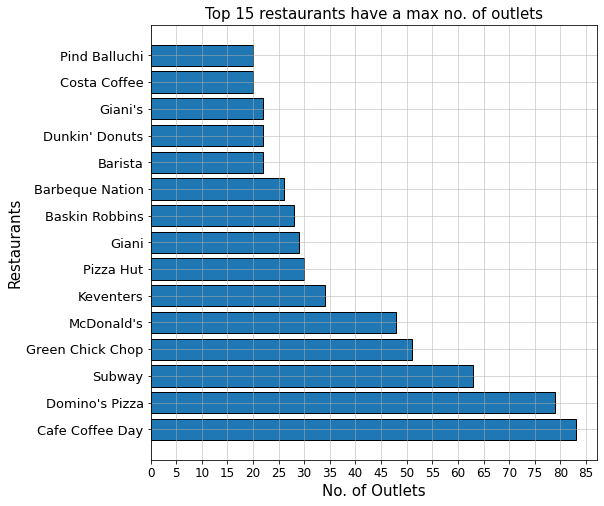

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")
df=df["Restaurant Name"]
ans=df.value_counts().head(15)
Restaurant_Name=[]
Number_of_outlets=[]
for i in range(15):
    Restaurant_Name.append(ans.index[i])
    Number_of_outlets.append(ans.values[i])

plt.figure(figsize=(8,8))    
plt.barh(Restaurant_Name,Number_of_outlets,edgecolor="black")
plt.title("Top 15 restaurants have a max no. of outlets", fontsize =15)
plt.xlabel("No. of Outlets",fontsize = 15)
plt.ylabel("Restaurants",fontsize = 15)
plt.xticks(np.arange(0, 90, 5), size=12)
plt.yticks(size=13)
plt.grid(linewidth = 0.5)
plt.show()

    

*** Question 2: part 2] Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).***

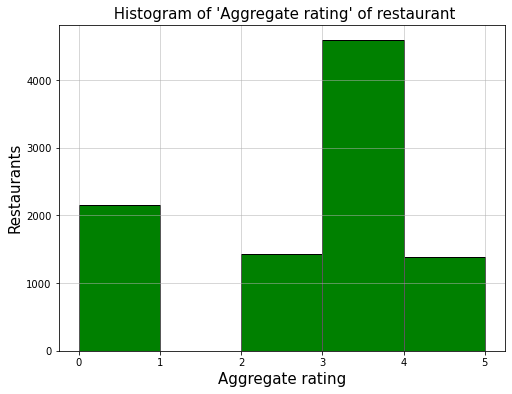

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")
rating=df["Aggregate rating"].dropna()

plt.figure(figsize=(8,6))
plt.hist(rating,edgecolor = "black",color = "green",bins=range(6))
plt.title(" Histogram of 'Aggregate rating' of restaurant", fontsize =15)
plt.xlabel("Aggregate rating",fontsize = 15)
plt.ylabel("Restaurants",fontsize = 15)
plt.grid(linewidth = 0.5)
plt.show()

*** Question 3: part 3]Plot the bar graph top 10 restaurants in the data with the highest number of votes.***

<ipython-input-186-b51abbba6e24>:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(Restaurant_Name,Number_of_Votes,color = 'cry')


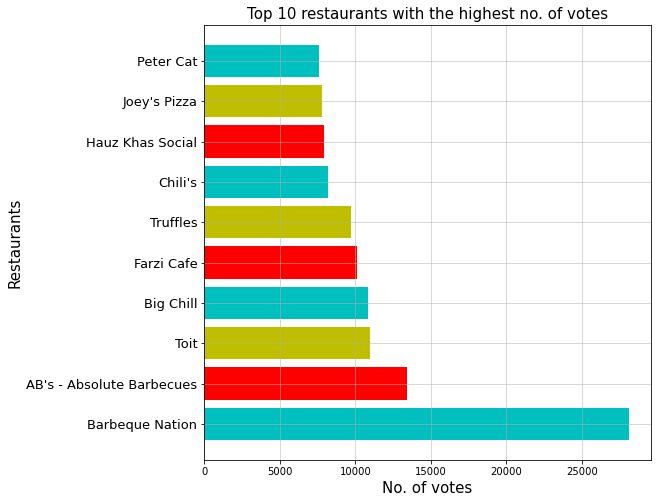

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")

restaurants=np.array([i for i in df["Restaurant Name"]])
votes=np.array([i for i in df["Votes"]])

restaurant_votes={}
for i in range(len(restaurants)):
    if restaurants[i] in restaurant_votes:
        restaurant_votes[restaurants[i]]+=votes[i]
    else:
        restaurant_votes[restaurants[i]]=votes[i]
        
restaurant_votes=Counter(restaurant_votes)
restaurant_wise_votes=restaurant_votes.most_common(10)

Restaurant_Name=[]
Number_of_Votes=[]
for data in restaurant_wise_votes:
    Restaurant_Name.append(data[0])
    Number_of_Votes.append(data[1])
    
#plot
plt.figure(figsize=(8,8))
plt.barh(Restaurant_Name,Number_of_Votes,color = 'cry')
plt.title("Top 10 restaurants with the highest no. of votes", fontsize =15)
plt.xlabel("No. of votes",fontsize = 15)
plt.ylabel("Restaurants",fontsize = 15)
plt.yticks(size=13)

plt.grid(linewidth = 0.5)
plt.show()
    

***  Question 3: part 4] Plot the pie graph of top 10 cuisines present in restaurants in the USA.***

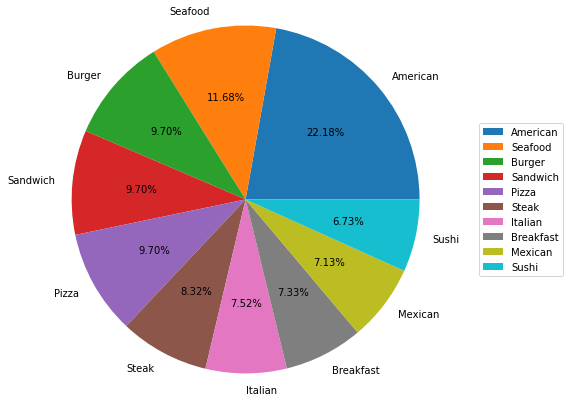

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")
df=df[df["Country Code"]==216]

df=df.loc[df['Cuisines'].notnull()]
cuisines_dict={}
def separateCuisines(name):
    name=name.split(",")
    cuisines_li=[]
    for data in name:
        cuisines_li.append(data.strip())
        
    for data in cuisines_li:
        if data in cuisines_dict:
            cuisines_dict[data]+=1
        else:
            cuisines_dict[data]=1
df["Cuisines"].apply(separateCuisines)
cuisines_dict=Counter(cuisines_dict)
cuisines=cuisines_dict.most_common(10)

cuisines_name=[]
freq=[]
for data in cuisines:
    cuisines_name.append(data[0])
    freq.append(data[1])
    

plt.pie(freq,labels=cuisines_name, radius=2, autopct='%.2f%%')
plt.legend(bbox_to_anchor=(1.55,0.5),loc = "center left")
plt.show()


*** Question 3: part 5] Plot the bubble graph of a number of Restaurants present in the city of 
    India and keeping the weighted restaurant rating of the city in a bubble.***

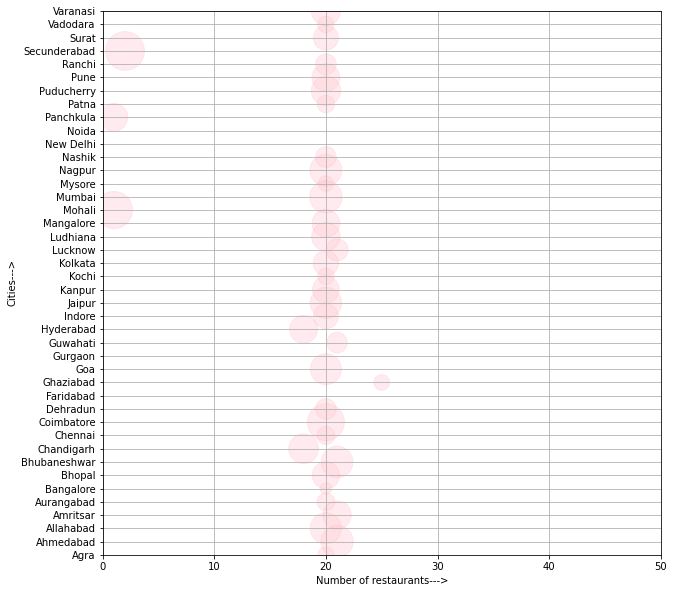

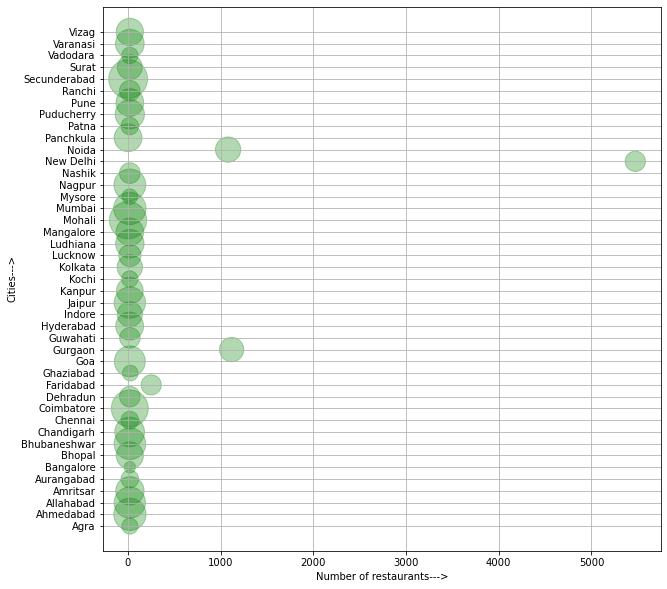

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\zomato.csv",encoding="ISO-8859-1")
df=df[df["Country Code"]==1]

np_city=np.array([i for i in df['City']])
np_rating=np.array([i for i in df['Aggregate rating']])
np_votes=np.array([i for i in df['Votes']])

dic={}
for i in set(np_city):
    if sum(np_votes[np.argwhere(np_city==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_city==i)])[0]/sum(np_votes[np.argwhere(np_city==i)])[0]



# Created the new dic1 dictionary which keeps the count of each city present in dataset

dic1={}

for i in np_city:
    if i in dic1.keys():
        dic1[i]+=1
    else:
        dic1[i]=1
        
## keeping size of bubble from dic
size=[]
for data in dic:
    size.append(dic[data])


plt.figure(figsize=(10, 10))
plt.scatter(dic1.values(), dic1.keys(), s=5**np.array(size), alpha=0.3, c='pink')
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cities--->')
plt.axis([0, 50, 'Agra', 'Varanasi'])
plt.grid()
plt.show()


plt.figure(figsize=(10, 10))
plt.scatter(dic1.values(), dic1.keys(), s=5**np.array(size), alpha=0.3, c='green')
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cities--->')
plt.grid()
plt.show()